<a href="https://colab.research.google.com/github/reedmarohn/lab-2-phase-2-reedmarohn/blob/main/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Reed_Marohn%2C_Ryan_Lee%2C_Eeshan_Mishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

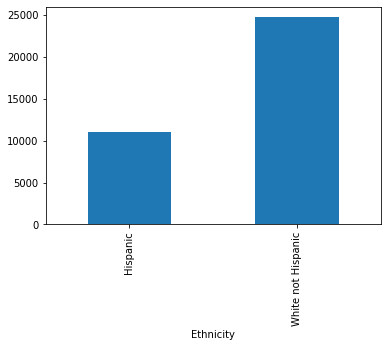

In [1]:
import pandas as pd
df_dds = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
df_dds["Ethnicity"].value_counts()
df_dds_wnh_h = df_dds[(df_dds["Ethnicity"] == "White not Hispanic") | (df_dds["Ethnicity"] == "Hispanic")]
df_dds_wnh_h.groupby("Ethnicity")["Expenditures"].mean().plot.bar()

The DDS spends more on average on White(non-Hispanic) residents than Hispanic residents.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

In [2]:
#df_dds_wnh_h.groupby(["Age Cohort", "Ethnicity"])["Expenditures"].mean().plot.bar()

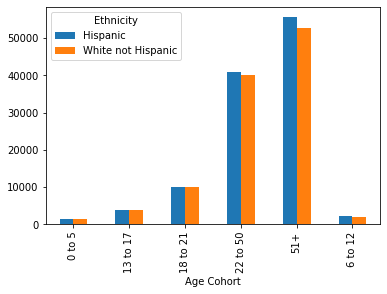

In [3]:
df_dds_wnh_h.groupby(["Age Cohort", "Ethnicity"])["Expenditures"].mean()
(df_dds_wnh_h.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean()).unstack("Ethnicity").plot.bar()

These results appear to contradict the results obtained in Question 1 as it looks like the average expenditures by age cohort amongst these two ethnicities groups are almost exactly the same.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

Ethnicity
Hispanic              AxesSubplot(0.125,0.125;0.775x0.755)
White not Hispanic    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

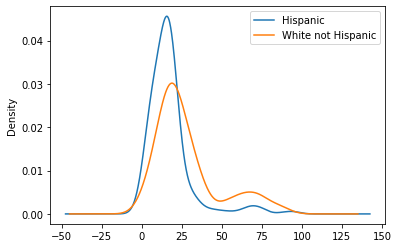

In [4]:
df_dds_wnh_h.groupby("Ethnicity")["Age"].plot.density(legend = True)

When looking at the distributions of ages of Hispanics and whites, there is a lot more young Hispanics and more older white people in the dataset. Why is this important? Well, you can see why this is important to the previous analyses when you view the average expenditure as a function of age(seen below).

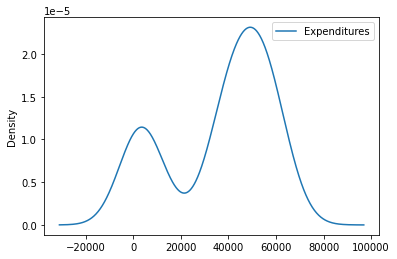

In [8]:
df_dds_wnh_h.groupby("Age")["Expenditures"].mean().plot.density(legend=True)

This graph shows that the older you are, the more money that the DDS spends on you.

To completely tell the story, basically there is a lot of young Hispanics and more old white people in the dataset as seen in the first density plot. The DDS spends more on older disabled people as seen in the second density plot. Question 2 shows that the distribution is the same for people in these age groups, but there were more white older people than old hispanic people and more young Hispanics than young whites in the dataset which caused the discrepancy seen in Question 1.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.